In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Derivación numérica

Vamos a estudiar distintos métodos para aproximar numéricamente el valor de la derivada, o de derivadas de orden superior, de una función $f(x)$ en un punto $x_*$:

$$ f'(x_*),\qquad f''(x_*),\qquad ... $$

**Motivaciones:**

- En ocasiones, no conocemos la expresión analítica de $f$.
- La función $f$ puede tener una expresión conocida; pero demasiado complicada de implementar.
- Estos métodos son pieza esencial de algunos métodos numéricos para resolver Ecuaciones Diferenciales Ordinarias (EDO) o Ecuaciones en Derivadas Parciales (EDP).

## Forma general de los métodos numéricos para calcular la derivada de una función
Los métodos que vamos a presentar se componen de tres ingredientes:

- El punto $x_*$ donde queremos evaluar la derivada de $f(x)$
- $N+1$ *nodos* distintos $x_0,x_1,\dots,x_N$.
- $N+1$ *pesos* $\alpha_0,\alpha_1,\dots,\alpha_N$.

Con ellos aproximamos:

$$f'(x_*)\approx \alpha_0 f(x_0)+\alpha_1 f(x_1)+ \dots + \alpha_N f(x_N).$$

*Observa que formalmente es la misma estructura que en las reglas de cuadratura.*

## Grado de exactitud

Una regla de derivación tiene **grado de exactitud** $M\geq 0$ si deriva de forma exacta cualquier polinomio de grado menor o igual a $M$, y el error cometido al derivar al menos un polinomio de grado $M+1$ es distinto de cero.

### Ejercicio

Supongamos que tenemos una regla de derivación 

$$ D_{x_*}(f)=\alpha_0 f(x_0)+\alpha_1 f(x_1)+ \dots + \alpha_N f(x_N) $$

con la propiedad de que deriva de forma exacta las funciones constantes. ¿Qué propiedad deben entonces de cumplir los pesos $\alpha_j$?

Muestra que en ese caso, tiene grado de exactitud $M$ si y sólo si deriva de forma exacta

$$ 1,x,x^2,\dots x^M $$

pero produce un error no nulo al derivar $x^{M+1}$.

>Supongamos que $D_{x_*}(1)$ es exacto. Entonces

>$$ 0 = \frac{d}{dx} 1 = D_{x_*}(1) = \alpha_0 \, 1 + \alpha_1\, 1 + \dots + \alpha_N \, 1. $$

>En otras palabras, la suma de los pesos ha de ser cero. Observa que si deriva de forma exacta las constantes entonces la regla de derivación tiene grado de exactitud al menos cero.

> Si $D_{x_*}(f)$ tiene grado de exactitud $M$ es inmediato ver que deriva de forma de exacta $1,x,\dots,x^{M}$. La derivada de $x^{M+1}$ no puede ser exacta, porque si lo fuera entonces derivaría de forma exacta **todos** los polinomios de grado $M+1$, al ser dichos polinomios combinaciones lineales de $1,x,\dots,x^{M+1}$ y al ser $D_{x_*}$ una operación lineal en $f$.

> El recíproco es cierto por el mismo motivo.

## Cómo deducir reglas de derivación con grado de exactitud dado

Partimos de $x_*$, y unos nodos $x_0,x_1,\dots,x_N$. Para calcular los pesos $\alpha_0,\alpha_1,\dots,\alpha_N$ consideramos el polinomio interpolador de $f$ por los nodos: $P_N(x)$.

Utilizamos como aproximación de la derivada:

$$f'(x_*)\approx P_N'(x_*).$$

## Reglas con un número de nodos dados

#### $N=0$ (un nodo). 
No tiene interés.

#### $N=1$ (dos nodos $x_0, x_1$). 
En ese caso el polinomio interpolador $P_1$ es:

$$ P_1(x)=f(x_0) + f[x_0,x_1](x - x_0) \implies P'_1(x_*) = f[x_0,x_1]=\underbrace{\frac{1}{x_1 - x_0}}_{\alpha_1}f(x_1)\; \underbrace{- \frac{1}{x_1 - x_0}}_{\alpha_0} f(x_0). $$

Los pesos no dependen por tanto del punto elegido $x_*$, sólo de los nodos $x_0,x_1$. 

Dos casos particulares importantes son:

 - **Diferencia progresiva.** $x_0=x_*<x_1$
 
 $$ f'(x_*)\approx \frac{f(x_*+h) - f(x_*)}{h},\qquad h:=x_1 - x_0>0.  $$
 
 - **Diferencia central.** $x_0<x_1$ y $x_* = \frac{x_0 + x_1}{2}$.
 
 $$ f'(x_*)\approx \frac{f(x_*+h) - f(x_*-h)}{2h},\qquad x_0 = x_*-h,\; x_1 = x_*+h.  $$
 

### Ejercicio. 
Comprueba que la diferencia progresiva tiene grado de exactitud $M=1$, mientras que la diferencia central tiene grado de exactitud $M=2$. 

> Sabemos que el grado de exactitud de las dos reglas es al menos uno.

> **Diferencia progresiva.** Para ver que es exactamente uno, hay que ver que la aproximación a la derivada de x^2 no es exacta.

>$$ D_{x_*}(x^2) = \frac{(x_{*}+h)^2 - (x_{*})^2}{h}= \frac{2hx_*+h^2}{h}=2x_* + h. $$

> **Diferencia central.** Vamos a ver que el grado de exactitud es al menos dos:

>$$ D_{x_*}(x^2) = \frac{(x_{*}+h)^2 - (x_{*}-h)^2}{2h}= \frac{4hx_*}{2h}=2x_*. $$

> Veamos que la derivada de $x^3$ no es exacta:

>$$ D_{x_*}(x^3) = \frac{(x_{*}+h)^3 - (x_{*}-h)^3}{2h}= \frac{6(x_*)^2h+2h^3}{2h}=3(x_*)^2 + h^2. $$

#### $N=2$ (tres nodos $x_0, x_1, x_2$).

Se suele utilizar sobre todo para aproximar la derivada segunda:

$$f''(x_*)\approx P_2''(x_*)=f[x_0,x_1,x_2] = \alpha_0f(x_0) + \alpha_1 f(x_1) + \alpha_2 f(x_2).$$

Es particularmente útil la fórmula central para la derivada segunda:

$$ f''(x_*) \approx \frac{f(x_*+h) - 2f(x_*) + f(x_*-h)}{h^2} $$

que corresponde a los nodos $x_0=x_*-h,\; x_1=x_*,\; x_2=x_*+h$. 

Esta regla tiene grado de exactitud $M=3$.

### Ejercicio. 
Comprueba que en general, los pesos de una regla con nodos $x_0,x_1,\dots,x_N$ se calculan mediante:
$$ \alpha_i = \ell_i'(x_*) $$
donde $\ell_i$ son los polinomios de la base de Lagrange asociada a los nodos. En particular esto muestra que dados $N+1$ nodos distintos, existe una única regla de derivación (obtenida por el método interpolatorio) que tiene grado de exactitud mayor o igual a $N$. 

> Sabemos que 

> $$ P_N(x) = f(x_0)\ell_0(x) + f(x_1)\ell_1(x) + \dots + f(x_N)\ell_N(x). $$

> Por tanto, derivando:

> $$ D_{x_*}(f) = P_N'(x_*) = f(x_0)\ell_0'(x_*) + f(x_1)\ell_1'(x_*) + \dots + f(x_N)\ell_N'(x_*). $$

> De ahí que

> $$ \alpha_0 = \ell_0'(x_*) , \alpha_1 = \ell_1'(x_*),\dots, \alpha_N = \ell_N'(x_*).$$

### Ejercicio. 
Encuentra una regla que permita aproximar  $f'(x_*)$ mediante cinco nodos equiespaciados centrados en $x_*$. ¿Cuál es su grado de exactitud? Indicación: puedes utilizar el ejercicio anterior y ayudarte del cálculo simbólico.

> Los nodos son:

> $$ x_0 = x_*-2h, x_1 = x_* - h, x_2 = x_*, x_3 = x_* + h, x_4 = x_* + 2h. $$

> Los pesos son:

> $$ \alpha_0 = \ell_0'(x_*), \alpha_1 = \ell_1'(x_*), \dots \alpha_4 = \ell_4'(x_*). $$

> Para obtener los pesos, veamos qué pinta tiene la derivada de un polinomio de lagrange. Para ello, recordemos que
$$
\bigg(\prod_{i=0}^n f_i \bigg)^{\prime} = \sum_{i=0}^n \bigg( f_i^{\prime} \prod_{j \neq i, j=0}^n f_j \bigg)
$$
Bien, veamos ahora cómo es $l^{\prime}_0(x_{\ast})$ en el caso de cinco nodos. Recordemos que $x_{\ast}$, el punto donde evaluaremos la derivada, coincide en este caso con el tercero de los nodos, $x_2$. En primer lugar tenemos
$$
l_0(x) = \dfrac{(x - x_1)(x - x_2)(x - x_3)(x - x_4)}{(x_0 - x_1) (x_0 - x_2) (x_0 - x_3) (x_0 - x_4)}.
$$
El denominador es una constante, y el numerador es un producto, luego su derivada se obtiene como hemos visto más arriba. Con ello obtenemos:
$$
l^{\prime}_0(x) = \dfrac{
(x - x_2)(x - x_3)(x - x_4) + 
(x - x_1)(x - x_3)(x - x_4) + 
(x - x_1)(x - x_2)(x - x_4) + 
(x - x_1)(x - x_2)(x - x_3)
}{
(x_0 - x_1) (x_0 - x_2) (x_0 - x_3) (x_0 - x_4)}
$$

>$$
l^{\prime}_0(x) = \dfrac{2 h^3}{24 h⁴} = \dfrac{1}{12 h}
$$
 
>En el caso de $l_1^{\prime}(x)$ tengo:
$$
l^{\prime}_1(x) = \dfrac{
(x - x_0)(x - x_3)(x - x_4) + 
(x - x_0)(x - x_2)(x - x_4) + 
(x - x_2)(x - x_3)(x - x_4) + 
(x - x_0)(x - x_2)(x - x_3)
}{
(x_1 - x_0) (x_1 - x_2) (x_1 - x_3) (x_1 - x_4)}
$$
Ahora, evaluaremos esta función en $x_{\ast} = x_2$. Ello hace que la mayoría de los sumandos en el numerador se anulen. Además, teniendo en cuenta la eleción de nodos que hemos hecho, los factores en el sumando que nos queda son todos múltiplos enteros de $h = x_{i+1} - x_i$. Haciendo esa cuenta para cada uno de los polinomios de lagrange, y usando el mismo razonamiento en el denominador, se obtiene
$$
\alpha_0 = l_0^{\prime}(x_{\ast}) = \dfrac{1}{12 h} \\
\alpha_1 = l_1^{\prime}(x_{\ast}) = \dfrac{-2}{3 h} \\
\alpha_2 = l_2^{\prime}(x_{\ast}) = 0 \\
\alpha_3 = l_3^{\prime}(x_{\ast}) = \dfrac{2}{3 h} \\
\alpha_4 = l_4^{\prime}(x_{\ast}) = \dfrac{-1}{12 h}
$$

>Con ello, nuestra regla de derivación queda:

>$$
f^{\prime}(x_{\ast}) \simeq \dfrac{1}{12h} f(x_{\ast} -2h) - \dfrac{2}{3h}f(x_{\ast} -h) + \dfrac{2}{3h}f(x_{\ast} +h) - \dfrac{1}{12h}f(x_{\ast} +2h)
$$


## Análisis del error

Para obtener una acotación del error cometido por una regla de derivación $D_{x_*}$ basta utilizar el polinomio de Taylor de $f$ en el punto $x_*$ de orden $M$, siendo $M$ el grado de exactitud de la regla de derivación. El error, bien entendido, viene dado por
$$E_h = f'(x_*) - D_{x_*}^h(f)$$
siendo $D_{x_*}^h(f)$ la regla de derivación que estemos considerando.

### Diferencia progresiva

$$ |E_h| \leq \frac{h}{2}\max_{x_*\leq\xi\leq x_*+h} |f''(\xi)|. $$

### Diferencia centrada 

$$ |E_h|\leq \frac{h^2}{6}\max_{x_*-h\leq\xi\leq x_*+h} |f'''(\xi)|. $$

### Diferencia centrada para la derivada segunda

$$ |E_h|\leq \frac{h^2}{12}\max_{x_*-h\leq\xi\leq x_*+h} |f^{(iv)}(\xi)|. $$


## El problema de derivación está *mal puesto*

Por esto queremos decir que pequeñas variaciones en $f$ pueden dar lugar a grandes cambios en $f'$.

Este carácter mal puesto se traslada a la derivación numérica; además de este problema, la derivación numérica presenta otras dos dificultades. En el caso de la diferencia progresiva:

- Un error de redondeo de tamaño $\epsilon$ en $f(x_*+h),f(x_*)$ cambia el valor de la aproximación a la derivada en una cantidad de orden $\epsilon/h$, que puede ser relativamente grande.

- Si $f(x_*+h)$ y $f(x_*)$ son cantidades muy próximas (en relación a la precisión de la artimética flotante que utilicemos), la definición de diferencia progresiva involucra la sustracción de cantidades vecinas, con la consiguiente amplificación del error de redondeo.



## Veamos esto en un ejemplo

Aproximamos la derivada de $f(x) = e^x$ en $x=1$ por la diferencia:

$$f'(x) \approx \frac{f(x + h) - f(x)}{h}$$

Comparamos el error cuando $h$ decrece, entre la aproximación y la respuesta correcta $f'(1) = e$.

Usamos un gráfico de tipo `loglog`, en el que ambos ejes están en escala logarítmica.

Observamos que a menor $h$, menor error, hasta que $h$ es aproximadamente 1e-8: para un $h$ menor, el error aumenta.

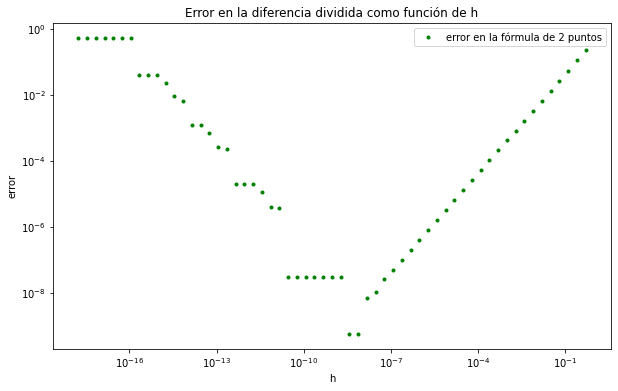

In [2]:
f = np.sin
#Derivada de f
fp = np.cos

x0 = 1
fp0 = fp(x0)

#Usamos valores de h de la forma 1/2^n
hs = np.array([2.0**(-n) for n in range(1, 60)])
fd_2p_forward = (f(x0+hs) - f(x0))/hs
errores_2p = np.abs(fd_2p_forward - fp0)

plt.figure(figsize=(10,6))
plt.title('Error en la diferencia dividida como función de h')
plt.loglog(hs, errores_2p, 'g.', label='error en la fórmula de 2 puntos')
plt.xlabel("h")
plt.ylabel("error")
plt.legend()

Recordamos la expresión que derivamos para el error de truncamiento que comete la diferencia de dos puntos hacia delante:

$$
f'(x) = \frac{f(x + h) - f(x)}{h} - \frac{h}{2}f''(\xi)
$$
para un punto $\xi\in (x, x + h)$.

Dibujamos los errores que comete y los comparamos con la cota del error, usando la aproximación $f''(\xi)\approx f''(x)$.

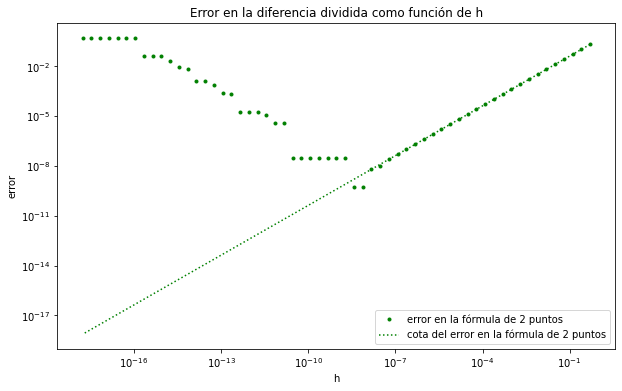

In [3]:
f = np.sin
#Derivada de f
fp = np.cos
#Segunda derivada de f
fp2 = lambda x:-np.sin(x)

x0 = 1
fp0 = fp(x0)
#hs  = np.exp(-np.linspace(0,40,100))
hs = np.array([2.0**(-n) for n in range(1, 60)])
fd_2p_forward = (f(x0+hs) - f(x0))/hs
errores_2p = np.abs(fd_2p_forward - fp0)
cota_error_2p = np.abs(fp2(x0))*hs/2

plt.figure(figsize=(10,6))
plt.title('Error en la diferencia dividida como función de h')
plt.loglog(hs, errores_2p, 'g.', label='error en la fórmula de 2 puntos')
plt.loglog(hs, cota_error_2p, 'g:', label='cota del error en la fórmula de 2 puntos')
plt.xlabel("h")
plt.ylabel("error")
plt.legend()

Recordamos que si incorporamos el error de redondeo, obtenemos una cota mejor

$$
\left|f'(x) - \frac{f(x + h) - f(x)}{h}\right| < \frac{\varepsilon}{h} + \frac{h}{2}M
$$
donde $\varepsilon$ es una cota del error de redondeo al evaluar $f$, que estimamos como el epsilon de la máquina (aunque para algunas funciones puede ser demasiado optimista), y $M$ es una cota para $|f''(\xi)|$ cuando $\xi\in (x, x + h)$.

In [4]:
eps=np.finfo(float).eps
eps

2.220446049250313e-16

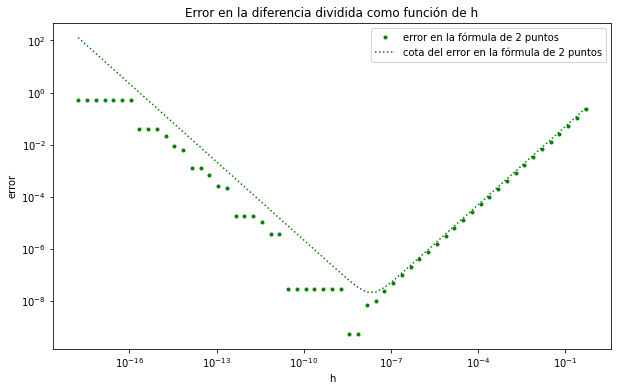

In [5]:
f = np.sin
fp = np.cos
fp2 = lambda x:-np.sin(x)
x0 = 1

fp0 = fp(x0)
#hs  = np.exp(-np.linspace(0,40,100))
hs = np.array([2.0**(-n) for n in range(1, 60)])
fd_2p_forward = (f(x0+hs) - f(x0))/hs
errores_2p = np.abs(fd_2p_forward - fp0)

M = 1
# Si cambias x0, o f, es necesario cambiar la cota M
# la línea siguiente estima M como el máximo entre
# |fp2(x0)| y |fp2(x0+h)|
#M = np.maximum(np.abs(fp2(x0)), np.abs(fp2(x0+hs)))
eps=np.finfo(float).eps
cota_error_2p = eps/hs + M*hs/2

plt.figure(figsize=(10,6))
plt.title('Error en la diferencia dividida como función de h')
plt.loglog(hs, errores_2p, 'g.', label='error en la fórmula de 2 puntos')
plt.loglog(hs, cota_error_2p, 'g:', label='cota del error en la fórmula de 2 puntos')
plt.xlabel("h")
plt.ylabel("error")
plt.legend()

### Ejercicio

 - Dibuja en la misma gráfica ``loglog`` los errores que cometen la aproximación a $f'$ de dos puntos hacia delante, y la aproximación centrada de tres puntos.
 - Compara el error que comete la aproximación centrada de tres puntos con la cota del error que vimos en clase:
$$
\left|f'(x) - \frac{f(x + h) - f(x-h)}{2h}\right| < \frac{\varepsilon}{h} + \frac{h^2}{6}M
$$
para una cota $M$ de $f^{(3}(\xi)$ con $\xi\in(x-h,x+h)$.

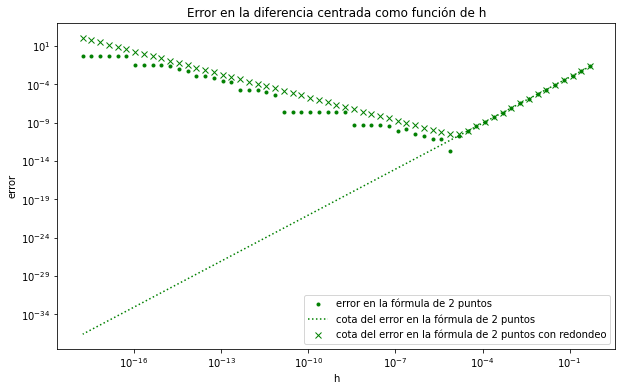

In [6]:
f = np.sin
#Derivada de f
fp = np.cos
# Tercera derivada de f
fp3 = lambda x:-np.cos(x)

x0 = 1
fp0 = fp(x0)
#hs  = np.exp(-np.linspace(0,40,100))
hs = np.array([2.0**(-n) for n in range(1, 60)])
fd_2p_centered = (f(x0+hs) - f(x0-hs))/(2*hs)
errores_2p = np.abs(fd_2p_centered - fp0)
cota_error_2p = np.abs(fp3(x0))*hs**2/6
cota_error_2p_r = cota_error_2p + eps/hs

plt.figure(figsize=(10,6))
plt.title('Error en la diferencia centrada como función de h')
plt.loglog(hs, errores_2p, 'g.', label='error en la fórmula de 2 puntos')
plt.loglog(hs, cota_error_2p, 'g:', label='cota del error en la fórmula de 2 puntos')
plt.loglog(hs, cota_error_2p_r, 'gx', label='cota del error en la fórmula de 2 puntos con redondeo')
plt.xlabel("h")
plt.ylabel("error")
plt.legend()

Ahora hacemos otro tipo de gráfica: dejamos $h$ fijo (no demasiado pequeño) y cambiamos $x$.

Dibujamos los errores que comete y los comparamos con la cota del error:
$$
f'(x) = \frac{f(x + h) - f(x)}{h} - \frac{h}{2}f''(\xi)
$$
para un punto $\xi\in (x, x + h)$, usando la aproximación $f''(\xi)\approx f''(x)$.

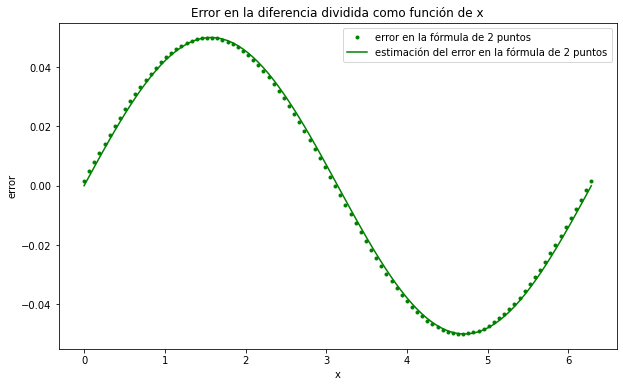

In [7]:
f = np.sin
fp = np.cos
fp2 = lambda x:-np.sin(x)

xs = np.linspace(0,2*np.pi,100)
fps = fp(xs)
h = 0.1
fd_2p_forward = (f(xs + h) - f(xs))/h
errores_2p = fps - fd_2p_forward
cota_error_2p = - (h/2)*fp2(xs)

plt.figure(figsize=(10,6))
plt.title('Error en la diferencia dividida como función de x')
plt.plot(xs, errores_2p, 'g.', label='error en la fórmula de 2 puntos')
plt.plot(xs, cota_error_2p, 'g-', label='estimación del error en la fórmula de 2 puntos')
plt.xlabel("x")
plt.ylabel("error")
plt.legend()

### Ejercicio

 - Repite la gráfica anterior para otra función distinta
 - Repite la gráfica anterior para la diferencia centrada de dos puntos, con su estimación del error.

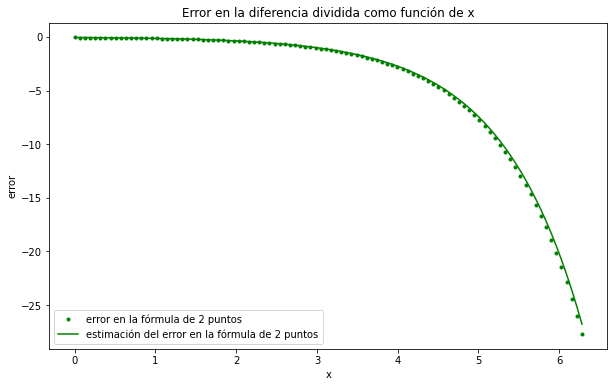

In [8]:
f   = np.exp #lambda x : x*x 
fp  = np.exp #lambda x : 2.*x
fp2 = np.exp #lambda x : np.repeat(2.,len(x))

xs  = np.linspace(0,2*np.pi,100)
fps = fp(xs)
h   = 0.1
fd_2p_forward = (f(xs + h) - f(xs))/h
errores_2p    = fps - fd_2p_forward
cota_error_2p = - (h/2)*fp2(xs)

plt.figure(figsize=(10,6))
plt.title('Error en la diferencia dividida como función de x')
plt.plot(xs, errores_2p, 'g.', label='error en la fórmula de 2 puntos')
plt.plot(xs, cota_error_2p, 'g-', label='estimación del error en la fórmula de 2 puntos')
plt.xlabel("x")
plt.ylabel("error")
plt.legend()

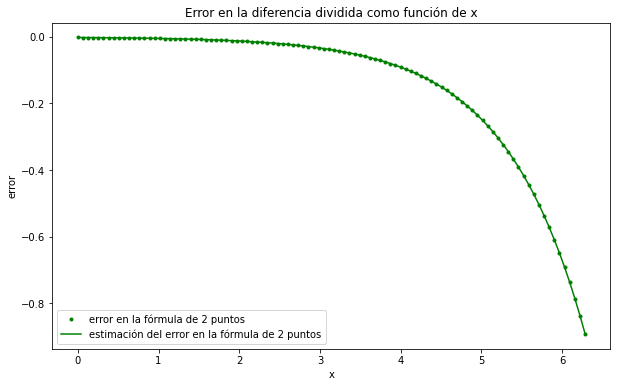

In [9]:
f   = np.exp 
fp  = np.exp
fp2 = np.exp
fp3 = np.exp

xs  = np.linspace(0,2*np.pi,100)
fps = fp(xs)
h   = 0.1
fd_3p_center  = (f(xs + h) - f(xs - h)) / (2 * h)
errores_3p    = fps - fd_3p_center
cota_error_3p = - (h*h / 6.) * fp3(xs)

plt.figure(figsize=(10,6))
plt.title('Error en la diferencia dividida como función de x')
plt.plot(xs, errores_3p, 'g.', label='error en la fórmula de 2 puntos')
plt.plot(xs, cota_error_3p, 'g-', label='estimación del error en la fórmula de 2 puntos')
plt.xlabel("x")
plt.ylabel("error")
plt.legend()


### Ejercicio
Recuerda la fórmula de tres puntos siguiente aproxima la segunda derivada de una función:

$$
f''(x_0)\approx\frac{f(x_0-h)-2f(x_0)+f(x_0+h)}{h^2}
$$

 - Dibuja el error que comete esta expresión al aproximar $f''$ para $f(x)=\sin(x)$ con valores de $h$ de la forma $1/2^n$, al igual que hicimos antes con la primera derivada.
 - Compara la gráfica anterior con la cota de error
 
$$
\left|f''(x) - \frac{f(x + h) - 2f(x) +f(x-h)}{h^2}\right| < \frac{\varepsilon}{h^2} + \frac{h^2}{12}M
$$

para una cota $M$ de $f^{(4}(\xi)$ con $\xi\in(x-h,x+h)$.

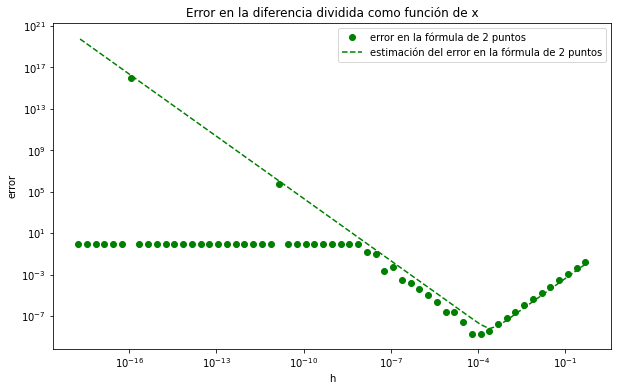

In [10]:
# Funcion y derivadas:
f   = np.sin
fp  = np.cos
fp2 = lambda x : -np.sin(x)
fp3 = lambda x : -np.cos(x) 
fp4 = f

# Cota para el error:
M4 = 1.

# Calculamos la segunda derivada numerica, la estimacion del error
# y la cota:
xs   = 1.
fp2s = fp2(xs)
hs   = 2.0**(-np.arange(1, 60, 1))
fd2_3p_center = (f(xs - hs) - 2*f(xs) + f(xs + hs)) / (hs * hs)
errores_3p    = np.abs(fp2s - fd2_3p_center)
cota_error_3p = eps / (hs*hs) + (hs*hs / 24.) * M4

# Pintamos:
plt.figure(figsize=(10,6))
plt.title('Error en la diferencia dividida como función de x')
plt.loglog(hs, errores_3p, 'go', label='error en la fórmula de 2 puntos')
plt.loglog(hs, cota_error_3p, 'g--', label='estimación del error en la fórmula de 2 puntos')
plt.xlabel("h")
plt.ylabel("error")
plt.legend()